In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import h5py
%matplotlib notebook
matplotlib.rc('lines', lw=2)
matplotlib.rc('font',**{'sans-serif':'Arial','family':'Helvetica'})
matplotlib.rc('xtick',**{'direction':'in'})
matplotlib.rc('ytick',**{'direction':'in'})

In [12]:
f=h5py.File('baseline.mat')

<IPython.core.display.Javascript object>


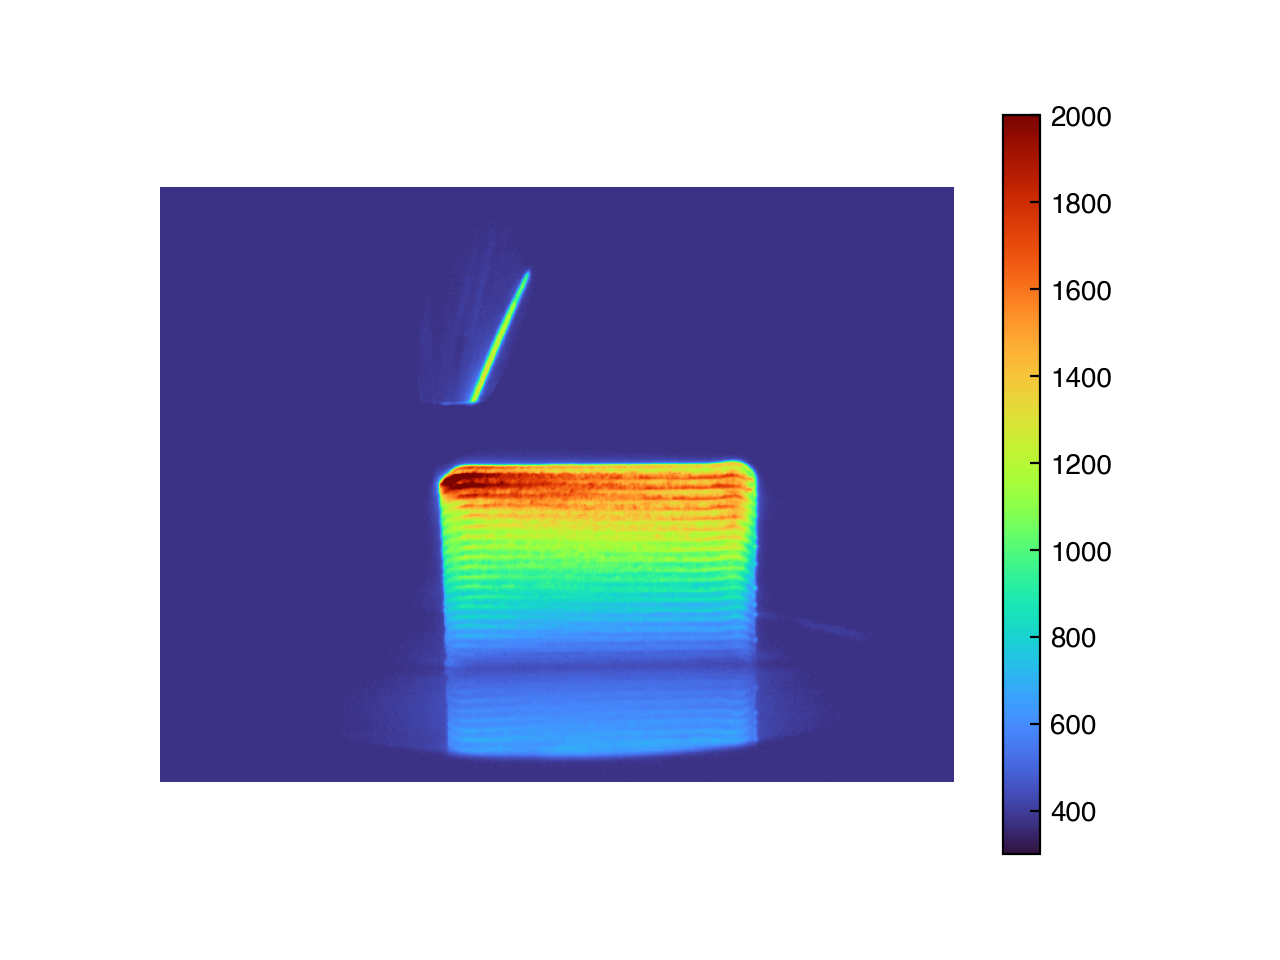

In [13]:
frame = f[f['data'][0,14041+486+35]][:]
plt.figure()
plt.imshow(frame.T,vmin=300,vmax=2000,cmap='turbo')
plt.colorbar()
plt.axis('off')
plt.show()

In [14]:
data = [];
for i in range(0,f['data'].shape[1]):
    frame = f[f['data'][0,i]][:]
    if frame.max() > 400:
        break;

for t in range(i-1,f['data'].shape[1]):
    frame = f[f['data'][0,t]][235:475,228:388]
    data.append(frame.reshape(60,4,40,4).sum(axis=3).sum(axis=1)/16)

In [15]:
period = 45.75/7 + 0.5;
for t in range(len(data)):
    layer = int(np.ceil(t/50/period))
    if layer < 40:
        data[t][:,0:40-layer] = data[t].min()

In [16]:
np.save('processed_data.npy',data)

<IPython.core.display.Javascript object>


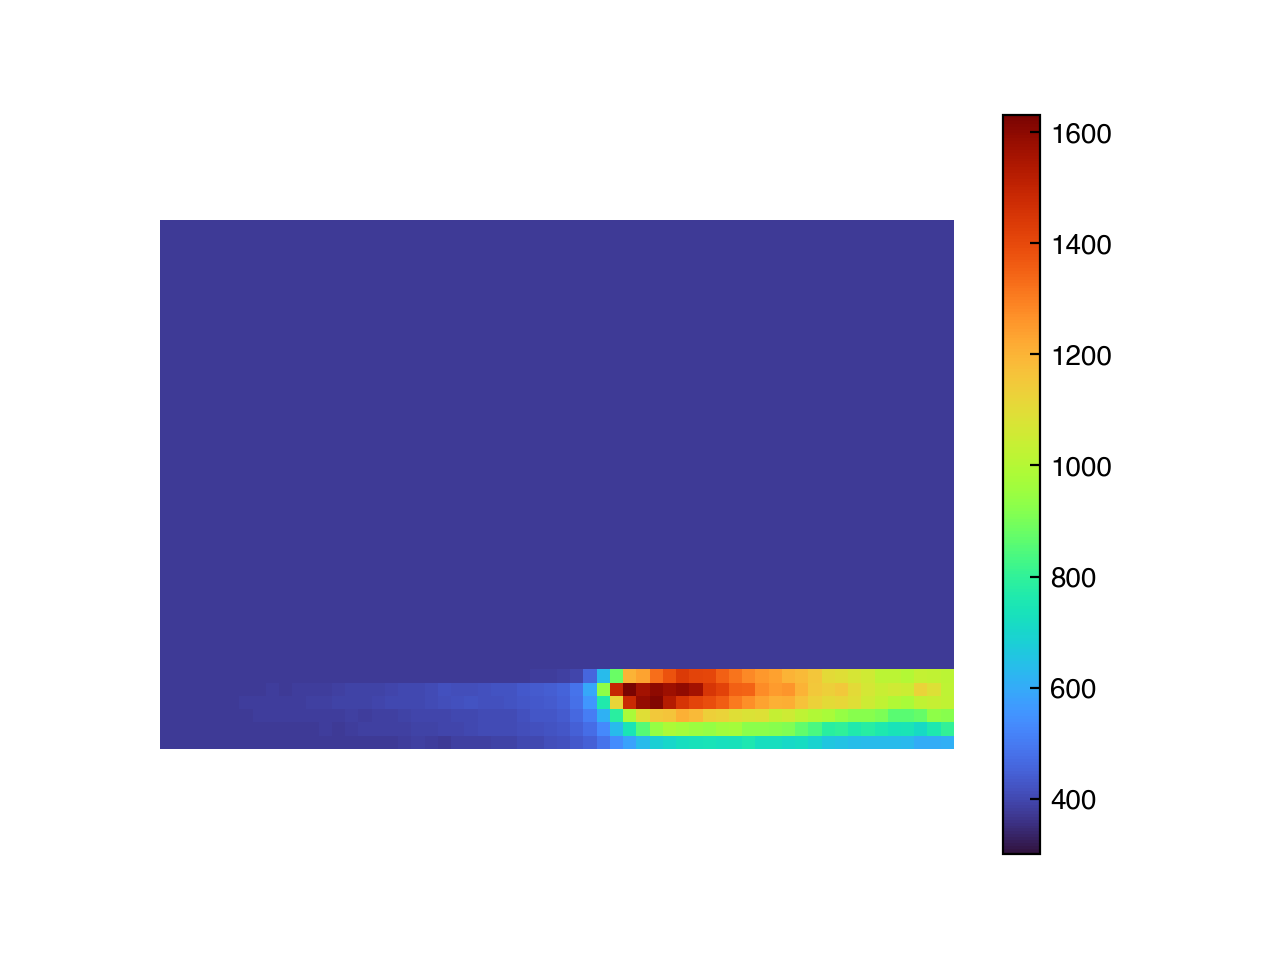

In [106]:
plt.figure()
plt.imshow(data[1900].T,vmin=300,cmap='turbo')
plt.colorbar()
plt.axis('off')
plt.show()

In [9]:
data[5000][8,40-15]

1260.7173

In [15]:
data[5000][7,40-1]

580.04755

In [ ]:
frame.sum()